# Telecom Churn : Group Case Study

Importing & Merging Data

In [0]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
from google.colab import files

In [4]:
uploaded = files.upload()

Saving telecom_churn_data.csv to telecom_churn_data.csv


In [5]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name =fn,length = len(uploaded[fn])))

User uploaded file "telecom_churn_data.csv" with length 79156935 bytes


In [6]:
import io
churn_data = pd.read_csv(io.StringIO(uploaded["telecom_churn_data.csv"].decode('utf-8')))
print(churn_data.head())

   mobile_number  circle_id  loc_og_t2o_mou  ...  jul_vbc_3g  jun_vbc_3g sep_vbc_3g
0     7000842753        109             0.0  ...         0.0      101.20       3.58
1     7001865778        109             0.0  ...         0.0        0.00       0.00
2     7001625959        109             0.0  ...         0.0        4.17       0.00
3     7001204172        109             0.0  ...         0.0        0.00       0.00
4     7000142493        109             0.0  ...         0.0        0.00       0.00

[5 rows x 226 columns]


In [0]:
#Setting the default options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 50000)

In [9]:
#Get the initial number of rows in the churn_data dataset
print(len(churn_data))

99999


In [10]:
# Let's see the head of our master dataset
churn_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_t2c_mou_9  std_og_mou_6  std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  spl_og_mou_9  og_others_6  og_others_7  og_others_8  og_others_9  total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2t_mou_9  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2m_mou_9  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_t2f_mou_9  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  loc_ic_mou_9  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2t_mou_9  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2m_mou_9  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2f_mou_9  std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  std_ic_t2o_mou_9  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  std_ic_mou_9  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  spl_ic_mou_9  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  isd_ic_mou_9  ic_others_6  ic_others_7  ic_others_8  ic_others_9  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9 date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8 date_of_last_rech_9  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  last_day_rch_amt_9 date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8 date_of_last_rech_data_9  total_rech_data_6  total_rech_data_7  total_rech_data_8  total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  max_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  count_rech_3g_9  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  av_rech_amt_data_9  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_2g_mb_9  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  vol_3g_mb_9  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_3g_9  arpu_2g_6  arpu_2g_7  arpu_2g_8  arpu_2g_9  night_pck_user_6  night_pck_user_7  night_pck_user_8  night_pck_user_9  monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_2g_9  sachet_2g_6  sachet_2g_7  sachet_2g_8  sachet_2g_9  monthly_3g_6  monthly_3g_7  monthly_3g_8  monthly_3g_9  sachet_3g_6  sachet_3g_7  sachet_3g_8  sachet_3g_9  fb_user_6  fb_user_7  fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g
0     7000842753        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014  197.385  214.816  213.803   21.100          NaN          NaN         0.00          NaN           NaN           NaN          0.00           NaN            NaN            NaN           0.00            NaN            NaN            NaN           0.00     

In [11]:
churn_data.describe()


mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9   onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_t2c_mou_9  std_og_mou_6  std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  spl_og_mou_9   og_others_6   og_others_7   og_others_8   og_others_9  total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2t_mou_9  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2m_mou_9  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_t2f_mou_9  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  loc_ic_mou_9  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2t_mou_9  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2m_mou_9  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2f_mou_9  std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  std_ic_t2o_mou_9  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  std_ic_mou_9  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  spl_ic_mou_9  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  isd_ic_mou_9   ic_others_6   ic_others_7   ic_others_8   ic_others_9  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  last_day_rch_amt_9  total_rech_data_6  total_rech_data_7  total_rech_data_8  total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  max_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  count_rech_3g_9  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  av_rech_amt_data_9   vol_2g_mb_6   vol_2g_mb_7   vol_2g_mb_8   vol_2g_mb_9   vol_3g_mb_6   vol_3g_mb_7   vol_3g_mb_8   vol_3g_mb_9     arpu_3g_6     arpu_3g_7     arpu_3g_8     arpu_3g_9     arpu_2g_6     arpu_2g_7     arpu_2g_8     arpu_2g_9  night_pck_user_6  night_pck_user_7  night_pck_user_8  night_pck_user_9  monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_2g_9   sachet_2g_6   sachet_2g_7   sachet_2g_8   sachet_2g_9  monthly_3g_6  monthly_3g_7  monthly_3g_8  monthly_3g_9   sachet_3g_6   sachet_3g_7   sachet_3g_8   sachet_3g_9     fb_user_6     fb_user_7     fb_user_8     fb_user_9           aon    aug_vbc_3g    jul_vbc_3g    jun_vbc_3g    sep_vbc_3g
count   9.999900e+04    99999.0         98981.0         98981.0         98981.0  99999.000000  99999.000000  99999.000000  99999.000000  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   94621.000000   92254.000000   96062.000000   96140.000000   94621.000000   92254.000000      96062.000000      96140.000000      94621.000000      92254.000000      96062.000000      96140.000000      94621.000000      92254.000000      96062.000000      96140.000000      94621.000000      92254.

In [12]:
print(churn_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None


In [0]:
#Forming a variable which gives revenue of the first two months
churn_data['rev_sum'] = churn_data['arpu_6'] + churn_data['arpu_7']

In [0]:
#Forming a percentile variable on the rev_sum variable which denotes the revenue of first two months
churn_data['Percentile_rank']=churn_data.rev_sum.rank(pct=True)

In [17]:
print(churn_data['Percentile_rank'])

0        0.515025
1        0.491515
2        0.455275
3        0.576426
4        0.656717
5        0.090091
6        0.690567
7        0.985760
8        0.815988
9        0.466745
10       0.010360
11       0.410394
12       0.193102
13       0.738677
14       0.077261
15       0.634856
16       0.756348
17       0.744157
18       0.051281
19       0.507560
20       0.735467
21       0.884699
22       0.394914
23       0.342603
24       0.780148
25       0.625836
26       0.125596
27       0.029540
28       0.245932
29       0.193862
30       0.155182
31       0.627646
32       0.054971
33       0.995500
34       0.555996
35       0.683767
36       0.226502
37       0.026850
38       0.808538
39       0.339003
40       0.345723
41       0.829288
42       0.299023
43       0.461775
44       0.541055
45       0.322113
46       0.357494
47       0.081896
48       0.986310
49       0.169692
50       0.342958
51       0.095941
52       0.190172
53       0.978550
54       0.342333
55       0

In [18]:
# filter rows for percentile rank greater than 70  and we get closer to 30,000 people in the premium grade
churn_premium = churn_data[churn_data['Percentile_rank'] >0.7]
print(churn_premium.shape)


(30000, 228)


In [19]:
churn_premium.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_t2c_mou_9  std_og_mou_6  std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  spl_og_mou_9  og_others_6  og_others_7  og_others_8  og_others_9  total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2t_mou_9  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2m_mou_9  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_t2f_mou_9  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  loc_ic_mou_9  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2t_mou_9  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2m_mou_9  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2f_mou_9  std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  std_ic_t2o_mou_9  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  std_ic_mou_9  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  spl_ic_mou_9  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  isd_ic_mou_9  ic_others_6  ic_others_7  ic_others_8  ic_others_9  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9 date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8 date_of_last_rech_9  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  last_day_rch_amt_9 date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8 date_of_last_rech_data_9  total_rech_data_6  total_rech_data_7  total_rech_data_8  total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  max_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  count_rech_3g_9  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  av_rech_amt_data_9  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_2g_mb_9  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  vol_3g_mb_9  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_3g_9  arpu_2g_6  arpu_2g_7  arpu_2g_8  arpu_2g_9  night_pck_user_6  night_pck_user_7  night_pck_user_8  night_pck_user_9  monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_2g_9  sachet_2g_6  sachet_2g_7  sachet_2g_8  sachet_2g_9  monthly_3g_6  monthly_3g_7  monthly_3g_8  monthly_3g_9  sachet_3g_6  sachet_3g_7  sachet_3g_8  sachet_3g_9  fb_user_6  fb_user_7  fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g   rev_sum  Percentile_rank
7      7000701601        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014  1069.180  1349.850  3171.480  500.000        57.84        54.68        52.29          NaN        453.43        567.16        325.91           NaN          16.23          33.49          31.64            NaN          23.74 

In [20]:
churn_premium.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'fb_user_7', 'fb_user_8', 'fb_user_9', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'rev_sum', 'Percentile_rank'], dtype='object', length=228)

In [21]:
# Craeting the dependent Churn variable

churn_premium['churn'] = np.where((churn_premium.total_ic_mou_9 == 0) & (churn_premium.total_og_mou_9==0) & (churn_premium.vol_2g_mb_9==0) & (churn_premium.vol_3g_mb_9==0),1,0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
churn_premium.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_t2c_mou_9  std_og_mou_6  std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  spl_og_mou_9  og_others_6  og_others_7  og_others_8  og_others_9  total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2t_mou_9  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2m_mou_9  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_t2f_mou_9  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  loc_ic_mou_9  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2t_mou_9  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2m_mou_9  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2f_mou_9  std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  std_ic_t2o_mou_9  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  std_ic_mou_9  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  spl_ic_mou_9  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  isd_ic_mou_9  ic_others_6  ic_others_7  ic_others_8  ic_others_9  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9 date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8 date_of_last_rech_9  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  last_day_rch_amt_9 date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8 date_of_last_rech_data_9  total_rech_data_6  total_rech_data_7  total_rech_data_8  total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  max_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  count_rech_3g_9  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  av_rech_amt_data_9  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_2g_mb_9  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  vol_3g_mb_9  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_3g_9  arpu_2g_6  arpu_2g_7  arpu_2g_8  arpu_2g_9  night_pck_user_6  night_pck_user_7  night_pck_user_8  night_pck_user_9  monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_2g_9  sachet_2g_6  sachet_2g_7  sachet_2g_8  sachet_2g_9  monthly_3g_6  monthly_3g_7  monthly_3g_8  monthly_3g_9  sachet_3g_6  sachet_3g_7  sachet_3g_8  sachet_3g_9  fb_user_6  fb_user_7  fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g   rev_sum  Percentile_rank  churn
7      7000701601        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014  1069.180  1349.850  3171.480  500.000        57.84        54.68        52.29          NaN        453.43        567.16        325.91           NaN          16.23          33.49          31.64            NaN         

In [23]:
#Checking the Churn Rate
churn = (sum(churn_premium['churn'])/len(churn_premium['churn'].index))*100
churn

8.84

# Hence the given dataset has a churn rate of 8.84%

In [27]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
churn_premium.describe(percentiles=[.25,.5,.75,.90,.95,.99])

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9   onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_t2c_mou_9  std_og_mou_6  std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  spl_og_mou_9   og_others_6   og_others_7   og_others_8   og_others_9  total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2t_mou_9  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2m_mou_9  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_t2f_mou_9  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  loc_ic_mou_9  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2t_mou_9  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2m_mou_9  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2f_mou_9  std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  std_ic_t2o_mou_9  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  std_ic_mou_9  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  spl_ic_mou_9  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  isd_ic_mou_9   ic_others_6   ic_others_7   ic_others_8   ic_others_9  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  last_day_rch_amt_9  total_rech_data_6  total_rech_data_7  total_rech_data_8  total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  max_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  count_rech_3g_9  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  av_rech_amt_data_9   vol_2g_mb_6   vol_2g_mb_7   vol_2g_mb_8   vol_2g_mb_9   vol_3g_mb_6   vol_3g_mb_7   vol_3g_mb_8   vol_3g_mb_9     arpu_3g_6     arpu_3g_7     arpu_3g_8     arpu_3g_9     arpu_2g_6     arpu_2g_7     arpu_2g_8     arpu_2g_9  night_pck_user_6  night_pck_user_7  night_pck_user_8  night_pck_user_9  monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_2g_9   sachet_2g_6   sachet_2g_7   sachet_2g_8   sachet_2g_9  monthly_3g_6  monthly_3g_7  monthly_3g_8  monthly_3g_9   sachet_3g_6   sachet_3g_7   sachet_3g_8   sachet_3g_9     fb_user_6     fb_user_7     fb_user_8     fb_user_9           aon    aug_vbc_3g    jul_vbc_3g    jun_vbc_3g    sep_vbc_3g       rev_sum  Percentile_rank        churn
count   3.000000e+04    30000.0         29872.0         29872.0         29872.0  30000.000000  30000.000000  30000.000000  30000.000000  29686.000000  29666.000000  28976.000000  28233.000000   29686.00000  29666.000000  28976.000000  28233.000000   29686.000000   29666.000000   28976.000000   28233.000000   29686.000000   29666.000000   28976.000000   28233.000000      29686.000000      29666.000000      28976.000000      28233.000000      29686.000000      29666.000000      28976.000000      28233.000000      29686.000000    

In [0]:
## Hence, we see that most of the revenue variables like arpu_6,arpu_7,arpu_8 has outliers

In [0]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,roc_auc_score

In [0]:
# Dropping the object variables for XGBoost

churn_premium1 = churn_premium.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8','date_of_last_rech_data_9'], 1)

In [0]:
# Dropping all the variables belonging to 9th Month because it belongs to the performance period

churn_premium2 = churn_premium1.drop(['onnet_mou_9','offnet_mou_9','arpu_9',
                                      'roam_ic_mou_9','roam_og_mou_9','loc_og_t2t_mou_9','loc_og_t2m_mou_9',
                                      'loc_og_t2f_mou_9','loc_og_t2c_mou_9','loc_og_mou_9','std_og_t2t_mou_9',
                                      'std_og_t2m_mou_9','std_og_t2f_mou_9','std_og_t2c_mou_9','std_og_mou_9','isd_og_mou_9',
                                      'spl_og_mou_9','og_others_9','total_og_mou_9','loc_ic_t2t_mou_9','loc_ic_t2m_mou_9',
                                      'loc_ic_t2f_mou_9','loc_ic_mou_9','std_ic_t2t_mou_9','std_ic_t2m_mou_9',
                                      'std_ic_t2f_mou_9','std_ic_t2o_mou_9','std_ic_mou_9','total_ic_mou_9','spl_ic_mou_9',
                                      'isd_ic_mou_9','ic_others_9','total_rech_num_9','total_rech_amt_9','max_rech_amt_9',
                                      'total_rech_data_9','max_rech_data_9','count_rech_2g_9','count_rech_3g_9',
                                      'av_rech_amt_data_9','vol_2g_mb_9','vol_3g_mb_9','arpu_3g_9','arpu_2g_9',
                                      'night_pck_user_9','monthly_2g_9','sachet_2g_9','monthly_3g_9','sachet_3g_9','fb_user_9',
                                      'sep_vbc_3g'],1)


In [64]:
churn_premium2.shape

(30000, 166)

In [33]:
## Getting a cpp.ProfileReport(churn_premium)

## Here , we see that arpu_2g_6  is highly correlated with arpu_3g_6
pp.ProfileReport(churn_premium2)

In [0]:
# split data into X and y
X = churn_premium2.iloc[:,0:-1]
Y = churn_premium2.iloc[:,-1]

In [0]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size,
    random_state=seed)

In [36]:
# fit model to training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [44]:
# evaluate predictions

roc_auc_score(y_test,predictions)

0.801154766617483

In [0]:
## Hence, our model is able to differnetiate between the chrners and non - churners 80% of the times

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize = (111,111))

# plot feature importance using built-in function
from xgboost import plot_importance
plot_importance(model)
plt.show()

In [0]:
sorted_idx = np.argsort(model.feature_importances_)[::-1]

In [47]:
## After taking top 17 variables, the other variables are not that predictive enough for classification
for index in sorted_idx:
    print([X_train.columns[index], model.feature_importances_[index]])

['total_ic_mou_8', 0.190082]
['total_rech_amt_8', 0.05166674]
['max_rech_data_8', 0.043942202]
['loc_ic_mou_8', 0.03072515]
['last_day_rch_amt_8', 0.030059276]
['fb_user_8', 0.029452661]
['last_day_rch_amt_9', 0.029412461]
['av_rech_amt_data_8', 0.022951843]
['total_og_mou_8', 0.020171897]
['roam_og_mou_8', 0.019634105]
['total_ic_mou_7', 0.018323025]
['max_rech_amt_8', 0.018056206]
['total_rech_num_7', 0.017810881]
['std_og_mou_7', 0.016060764]
['vol_2g_mb_8', 0.015674388]
['arpu_8', 0.014931368]
['loc_og_t2m_mou_8', 0.012641796]
['roam_og_mou_7', 0.01154899]
['std_og_t2t_mou_6', 0.011128705]
['roam_ic_mou_8', 0.010097989]
['loc_og_t2f_mou_7', 0.009834356]
['loc_og_t2t_mou_8', 0.008727829]
['loc_ic_t2t_mou_8', 0.008711179]
['std_og_mou_6', 0.008012798]
['spl_ic_mou_8', 0.0078251315]
['isd_og_mou_8', 0.007799687]
['loc_og_t2f_mou_6', 0.0075237257]
['std_og_mou_8', 0.007336919]
['max_rech_amt_6', 0.0067988485]
['loc_ic_mou_7', 0.0059898384]
['loc_og_mou_8', 0.0059582107]
['arpu_3g_6', 0

# Now trying logistic regression with the top 17 Variables obtained using xgboost

In [0]:
#dropping the columns which have more than 60% NULL values
churn_premium2 = churn_premium2.drop(['fb_user_6','fb_user_7','fb_user_8',
                                   'night_pck_user_6','night_pck_user_7','night_pck_user_8',
                                   'arpu_2g_6','arpu_2g_7','arpu_2g_8',
                                   'arpu_3g_6','arpu_3g_7','arpu_3g_8',
                                   'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8',
                                   'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
                                   'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8',
                                   'max_rech_data_6','max_rech_data_7','max_rech_data_8',
                                   'total_rech_data_6','total_rech_data_7','total_rech_data_8'], 1)

In [66]:
churn_premium2.shape

(30000, 139)

In [0]:

# Removing NaN onnet_mou_8 rows
churn_premium2 = churn_premium2[~np.isnan(churn_premium2['onnet_mou_8'])]

# Removing NaN onnet_mou_6 rows
churn_premium2 = churn_premium2[~np.isnan(churn_premium2['onnet_mou_6'])]
churn_premium2.isnull().sum()

# Removing NaN onnet_mou_7 rows
churn_premium2 = churn_premium2[~np.isnan(churn_premium2['onnet_mou_7'])]
churn_premium2.isnull().sum()

#dropping mobile number and circle_id as well as one has unique values and the other has same value
churn_premium2 = churn_premium2.drop(['mobile_number','circle_id'], 1)

In [0]:
churn_premium2.isnull().sum()


In [69]:
churn_premium2.shape

(28781, 137)

In [0]:
# split data into X and y
X = churn_premium2.iloc[:,0:-1]
Y = churn_premium2.iloc[:,-1]

In [0]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size,
    random_state=seed)

In [0]:
#Keeping only the top 17 predictor variables in the dataset
X_train1 = X_train[['total_ic_mou_8','total_rech_amt_8','loc_ic_mou_8','last_day_rch_amt_8',
                    'total_og_mou_8','roam_og_mou_8','total_ic_mou_7',
                    'max_rech_amt_8','total_rech_num_7','std_og_mou_7','vol_2g_mb_8','arpu_8',
                    'loc_og_t2m_mou_8','roam_og_mou_7','std_og_t2t_mou_6','roam_ic_mou_8','loc_og_t2f_mou_7',
                    'loc_og_t2t_mou_8','loc_ic_t2t_mou_8']]

In [0]:
X_test1 = X_test[['total_ic_mou_8','total_rech_amt_8','loc_ic_mou_8','last_day_rch_amt_8',
                    'total_og_mou_8','roam_og_mou_8','total_ic_mou_7',
                    'max_rech_amt_8','total_rech_num_7','std_og_mou_7','vol_2g_mb_8','arpu_8',
                    'loc_og_t2m_mou_8','roam_og_mou_7','std_og_t2t_mou_6','roam_ic_mou_8','loc_og_t2f_mou_7',
                    'loc_og_t2t_mou_8','loc_ic_t2t_mou_8']]

In [0]:
import statsmodels.api as sm

In [0]:
# Logistic regression model

y_train = list(y_train)
logm1 = sm.GLM(y_train,(sm.add_constant(X_train1)), family = sm.families.Binomial())
logm1.fit().summary()

In [0]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

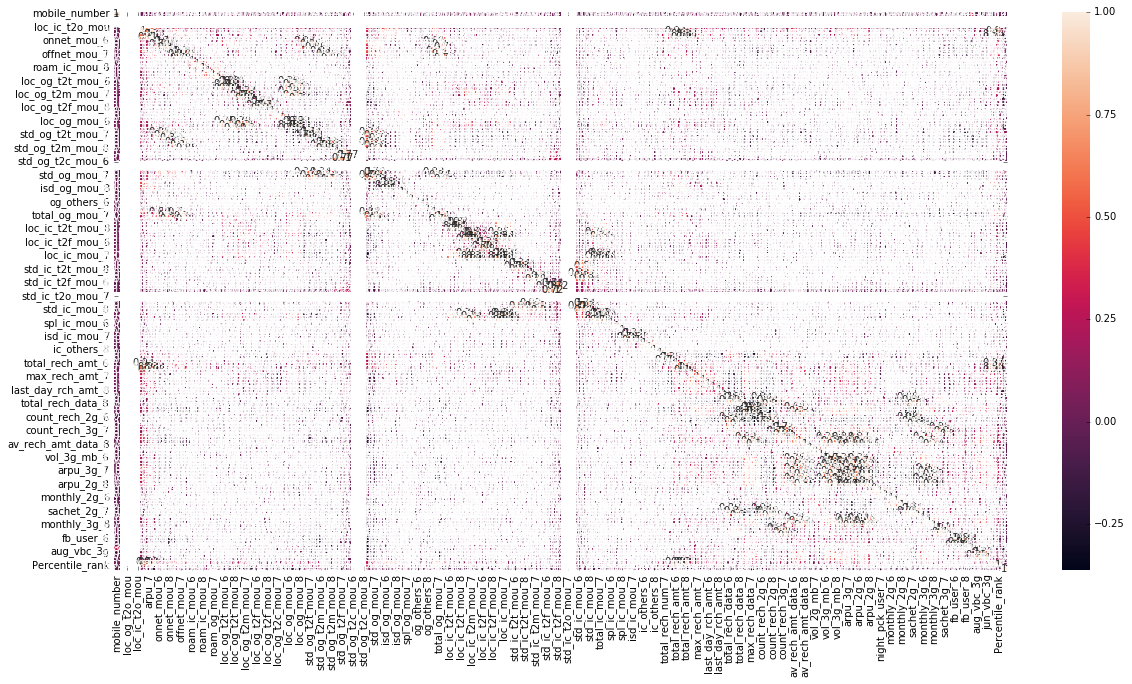

In [0]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(x_train1.corr(),annot = True)

In [78]:
##Now, let's try doing PCA on the dataset
X_train1.shape

(19283, 19)

In [0]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [81]:
#Doing the PCA on the train data
pca.fit(X_train1)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

Let's plot the principal components and try to make sense of them
We'll plot original features on the first 2 principal components as **axes**

In [82]:
pca.components_

array([[ 6.29768150e-02,  5.04235129e-01,  3.60337327e-02,
         3.18154628e-02,  6.04173706e-01,  9.13003429e-03,
         4.07366423e-02,  5.02719576e-02,  2.69065088e-03,
         4.16491333e-01, -4.05321075e-03,  4.09824405e-01,
         6.24311691e-02,  6.56743413e-03,  1.50678497e-01,
         1.34955581e-03,  5.89095463e-04,  4.41966889e-02,
         1.13659414e-02],
       [ 3.07987444e-01,  3.93925456e-01,  2.65552389e-01,
         6.03439345e-02, -1.59712466e-01,  4.38312328e-03,
         2.84185669e-01,  9.46368064e-02, -2.01227282e-03,
        -5.84601487e-01,  3.24868445e-02,  3.08121303e-01,
         1.45836069e-01,  4.58018022e-03, -2.99113658e-01,
         5.63060089e-03,  6.58708394e-03,  6.49256326e-02,
         8.80708533e-02],
       [-4.71093587e-01,  3.95922793e-01, -3.85481260e-01,
         3.69514576e-02, -2.79565584e-01,  3.33806459e-02,
        -4.76784222e-01,  6.56169902e-02, -8.45470954e-04,
        -1.70360677e-01,  4.38542038e-02,  2.89655910e-01,
    

In [83]:
colnames = list(X_train1.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

PC1       PC2             Feature
0  0.062977  0.307987      total_ic_mou_8
1  0.504235  0.393925    total_rech_amt_8
2  0.036034  0.265552        loc_ic_mou_8
3  0.031815  0.060344  last_day_rch_amt_8
4  0.604174 -0.159712      total_og_mou_8

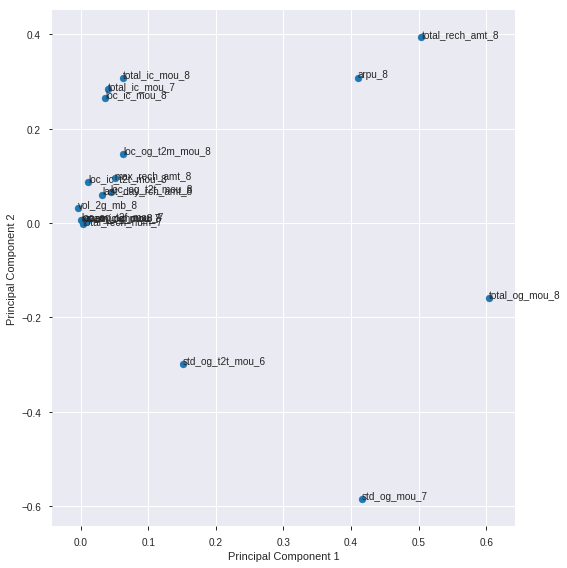

In [84]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [85]:
pca.explained_variance_ratio_

array([4.14653906e-01, 2.24792755e-01, 1.31107678e-01, 6.60646702e-02,
       4.29284517e-02, 3.28139753e-02, 1.80491286e-02, 1.55297880e-02,
       1.47944159e-02, 1.06665622e-02, 7.16823087e-03, 6.42184924e-03,
       4.75101512e-03, 3.54877469e-03, 3.20435635e-03, 1.99309490e-03,
       1.27025935e-03, 2.11042796e-04, 3.00450395e-05])

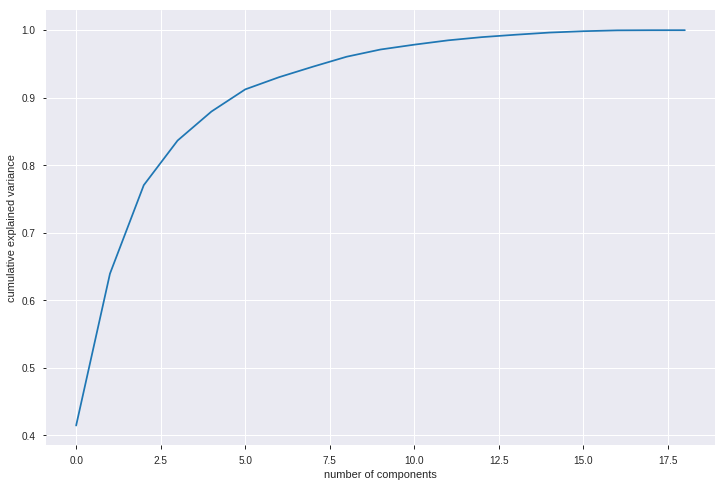

In [86]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [0]:
# So by taking 10 principal components we are able to capture 95% variation in the data and that is a good number to go ahead with
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=10)

In [88]:
df_train_pca = pca_final.fit_transform(X_train1)
df_train_pca.shape

(19283, 10)

In [0]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

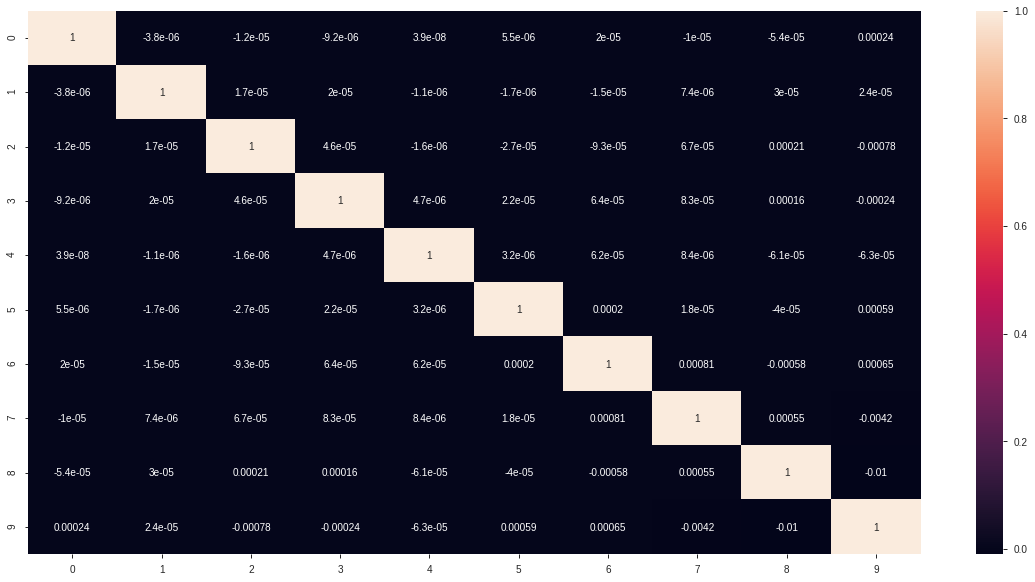

In [90]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [91]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0008060595981327532 , min corr:  -0.010307446160067624


In [92]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(X_test1)
df_test_pca.shape

(9498, 10)

In [93]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [94]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.85'

Hence, we are able to  correctly ditinguish churners and non churners 85% of the timers using 10 principal components 